In [2]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,0.0,0.0
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,0.0,0.0
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-27 00:00:00-04:00', '2023-10-30 00:00:00-04:00',
               '2023-10-31 00:00:00-04:00', '2023-11-01 00:00:00-04:00',
               '2023-11-02 00:00:00-04:00', '2023-11-03 00:00:00-04:00',
               '2023-11-06 00:00:00-05:00', '2023-11-07 00:00:00-05:00',
               '2023-11-08 00:00:00-05:00', '2023-11-09 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24081, freq=None)

## Cleaning and visualising the data

<Axes: xlabel='Date'>

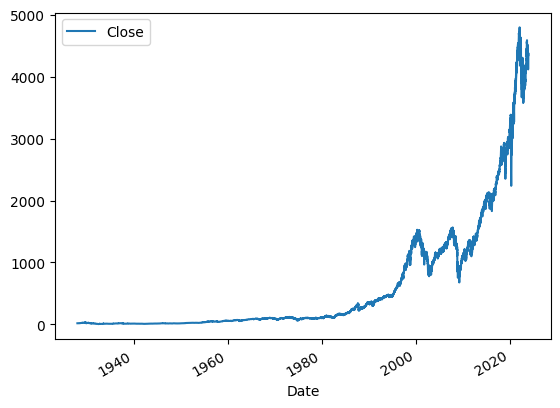

In [10]:
sp500.plot.line(y="Close", use_index=True)

In [11]:
# careful while delting the columns may be used as parameters in future

del sp500["Dividends"]
del sp500["Stock Splits"]

In [12]:
# setting target

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500   

In [14]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980,1
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883,1
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785,1


In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980,1
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883,1
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785,1


# Training

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# genrally higher n_estimators value the better it is upto a limit. Increase this from 100 in future
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [23]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])

In [24]:
preds = pd.Series(preds, index=test.index)

In [25]:
preds

Date
2023-06-21 00:00:00-04:00    1
2023-06-22 00:00:00-04:00    1
2023-06-23 00:00:00-04:00    0
2023-06-26 00:00:00-04:00    1
2023-06-27 00:00:00-04:00    1
                            ..
2023-11-03 00:00:00-04:00    1
2023-11-06 00:00:00-05:00    1
2023-11-07 00:00:00-05:00    1
2023-11-08 00:00:00-05:00    1
2023-11-09 00:00:00-05:00    1
Length: 100, dtype: int32

In [26]:
precision_score(test["Target"], preds)

0.49295774647887325

In [27]:
combined = pd.concat([test["Target"], preds],axis=1)

<Axes: xlabel='Date'>

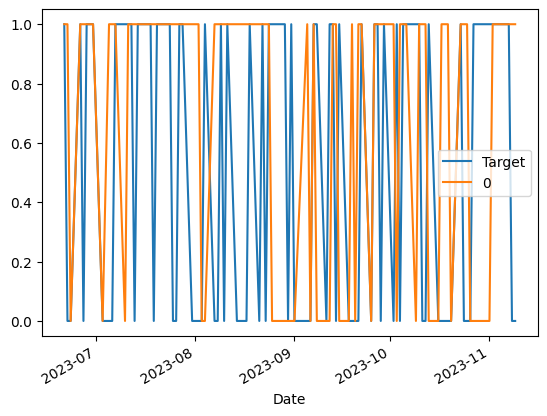

In [28]:
combined.plot()

# BackTesting


In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [30]:
def backtest(data, model, predictors, start = 2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [31]:
predictions = backtest(sp500, model, predictors)



In [32]:
predictions["Predictions"].value_counts()

Predictions
0    3445
1    2586
Name: count, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5278422273781903

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.533577
0    0.466423
Name: count, dtype: float64

# Adding predictors

In [44]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    



In [37]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980,1,1.004675,2.0,1.024306,5.0,0.999934,29.0,1.041862,126.0,1.112592,527.0
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883,1,1.000876,2.0,1.016585,5.0,1.002063,30.0,1.043131,126.0,1.114182,527.0
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785,1,1.001418,2.0,1.010784,5.0,1.005337,30.0,1.045544,126.0,1.116987,527.0


In [45]:
sp500 = sp500.dropna()

# changing / improving the model

In [46]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [47]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [48]:
predictions = backtest(sp500, model, new_predictors)

In [49]:
predictions["Predictions"].value_counts()

Predictions
0.0    4205
1.0     825
Name: count, dtype: int64

In [51]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5709090909090909